<a href="https://colab.research.google.com/github/MalithaPrabhashana/patternRecognitionCNN/blob/main/EN3150_Emeralds_A03_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Waste Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

# Path to your dataset zip file in Google Drive
zip_path = '/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/realwaste.zip'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/RealWaste')

['realwaste-main']

In [6]:
dataset_dir = "/content/drive/My Drive/Colab Notebooks/S5-EN3150 - Pattern Recognition/CNN_Waste_Classification/RealWaste/realwaste-main/RealWaste"

# Check if the dataset has been successfully extracted
os.listdir(dataset_dir)

['Cardboard',
 'Food Organics',
 'Glass',
 'Metal',
 'Miscellaneous Trash',
 'Paper',
 'Plastic',
 'Textile Trash',
 'Vegetation']

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation sets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Set as validation data

Found 3803 images belonging to 9 classes.
Found 949 images belonging to 9 classes.


In [48]:
print("Training Dataset: ", train_generator.samples)
print("Validation Dataset: ", validation_generator.samples)

Training Dataset:  3803
Validation Dataset:  949


In [49]:
class_indices = train_generator.class_indices
print(class_indices)

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


[0. 0. 0. 0. 0. 0. 1. 0. 0.]


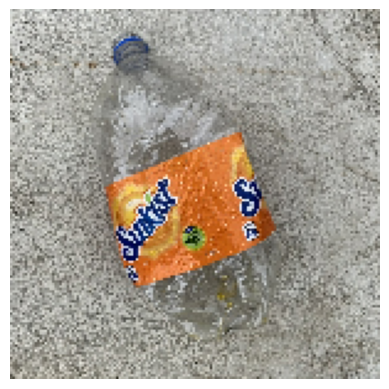

In [50]:
import matplotlib.pyplot as plt

# Load one batch of images and labels
X_batch, y_batch = next(train_generator)  # train_generator is the generator you've defined

# Display the first image from the batch
print(y_batch[0])
plt.imshow(X_batch[0])  # Display the first image (index 0) from the batch
plt.axis('off')         # Turn off axis labels for a cleaner look
plt.show()              # Show the image

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}
